In [9]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 6

%run resource_cpu.ipynb
%run resource_disktape.ipynb

jsons=['RelyOnMiniAOD.json', 'Analysis.json', '2018changes.json', 'IntroduceNanoAOD.json'] 
model=create_model(jsons )
model['names']=jsons
processing_times=software_performance(model)
events,cpu_time,cpu_required=compute_cpu_needs(model,processing_times)
add_analysis_model(model,events,cpu_time,cpu_required)
shutdown_year_model(model,processing_times,events,cpu_time,cpu_required)

#total_cpu_required, total_cpu_time, hpc_cpu_required, hpc_cpu_time = 
compute_totals(cpu_time,cpu_required)
cpu_capacity,cpu_time_capacity,cpuCapacity,cpuTimeCapacity=cpu_capacity(model)
print_cpu_results(cpu_time,cpu_required,#total_cpu_required, total_cpu_time, hpc_cpu_required, hpc_cpu_time,
                  cpu_capacity,cpu_time_capacity,cpuCapacity,cpuTimeCapacity)
print_cpu_info(model,cpu_time)

BaseModel.json
RealisticModel.json
RelyOnMiniAOD.json
Analysis.json
2018changes.json
IntroduceNanoAOD.json
Year / Reco / LHC SIM / HLLHC SIM times
(2016, 250, 800, 4700)
(2017, 250, 800, 4700)
(2018, 250, 800, 4700)
(2019, 227, 727, 4272)
(2020, 206, 661, 3884)
(2021, 276, 842, 3531)
(2022, 251, 766, 3210)
(2023, 228, 696, 2918)
(2024, 207, 633, 2653)
(2025, 1590, 633, 2411)
(2026, 1446, 633, 2192)
(2027, 1314, 633, 1993)
(2028, 1195, 633, 1812)
(2029, 1086, 633, 1647)
(2030, 987, 633, 1497)
()
Using new analysis method
('ok', 2019, 6252454973262.031)
('ok', 2024, 2857360004173.121)
('ok', 2030, 135869734144446.84)
CPU requirements in HS06
Year Prompt NonPrompt LHCMC HLLHCMC Ana Total Cap1 Cap2 Ratio USCMS HPC
(2016, '0.441', '0.295', '0.884', '0.060', '0.139', '1.818', '1.603', '1.630', 'MHS06', '1.115', '0.727', '0.681')
(2017, '0.441', '0.295', '0.884', '0.073', '0.290', '1.983', '1.823', '1.634', 'MHS06', '1.214', '0.793', '0.631')
(2018, '0.441', '0.295', '0.884', '0.086', '0.442'

{2016: 1602727.2727272727, 2017: 1822590.909090909, 2018: 2061461.3636363635, 2019: 2321388.2954545454, 2020: 3003918.8806818184, 2021: 3732182.936647727, 2022: 4511879.789815341, 2023: 5349222.400324575, 2024: 6250991.540308346, 2025: 7224595.24929293, 2026: 8278134.101428283, 2027: 9420472.87241687, 2028: 10661319.25246203, 2029: 12011310.31587153, 2030: 13482107.528713815}
{'2030': 8652445.648880005, '2024': 4884080.0, '2025': 5372488.0, '2026': 5909736.800000001, '2027': 6500710.480000001, '2020': 2218300.0, '2018': 1671000.0, '2022': 3410300.0, '2023': 4112100.0, '2019': 1744300.0, '2017': 1634000.0, '2016': 1630000.0, '2028': 7150781.528000003, '2029': 7865859.680800004, '2021': 2772300.0}


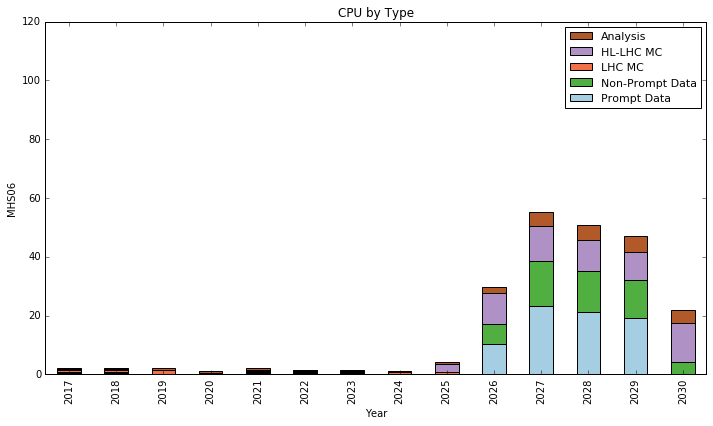

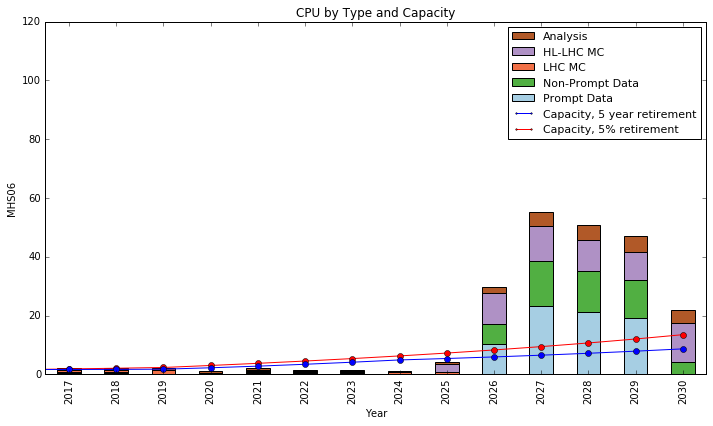

In [10]:
plot_hs06(model,cpu_required,cpu_capacity,cpuCapacity)

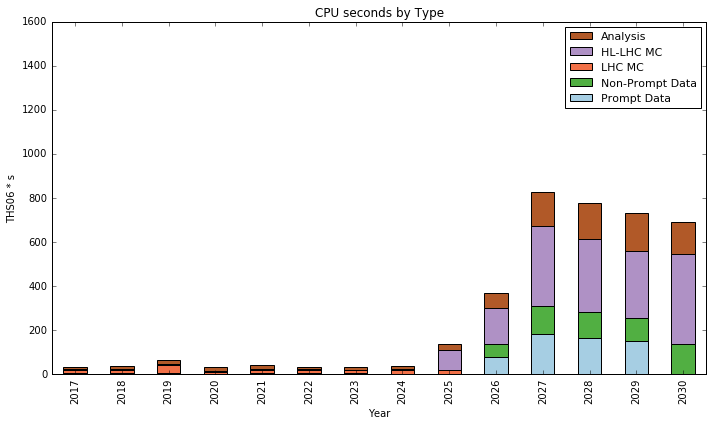

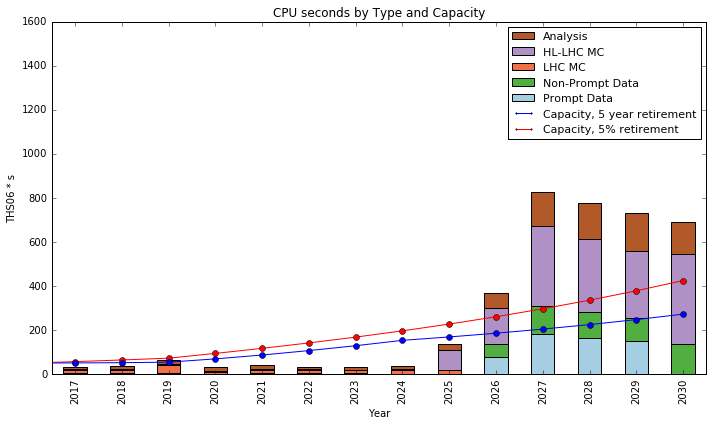

In [11]:
plot_cpu_hs06s(model,cpu_time,cpu_time_capacity,cpuTimeCapacity)

#%run cpu.py RelyOnMiniAOD.json Analysis.json 2018changes.json IntroduceNanoAOD.json Run2024.json

min Year 0.5


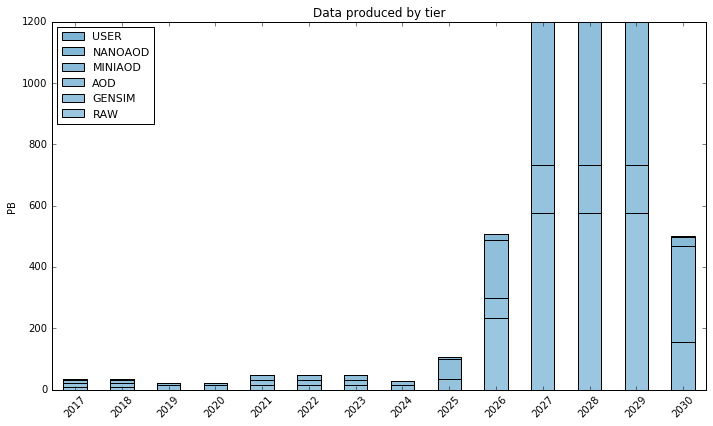

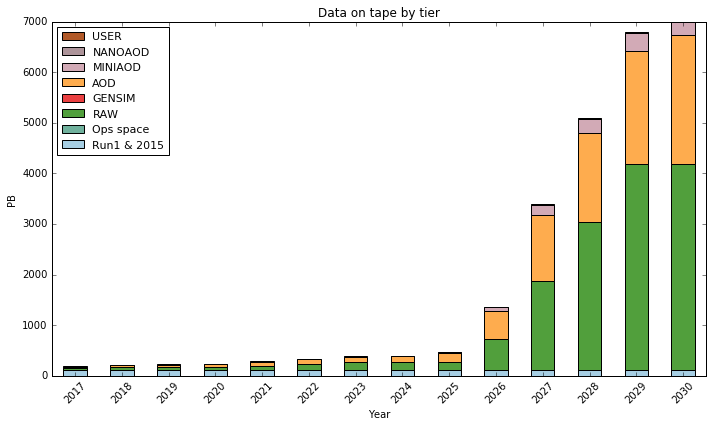

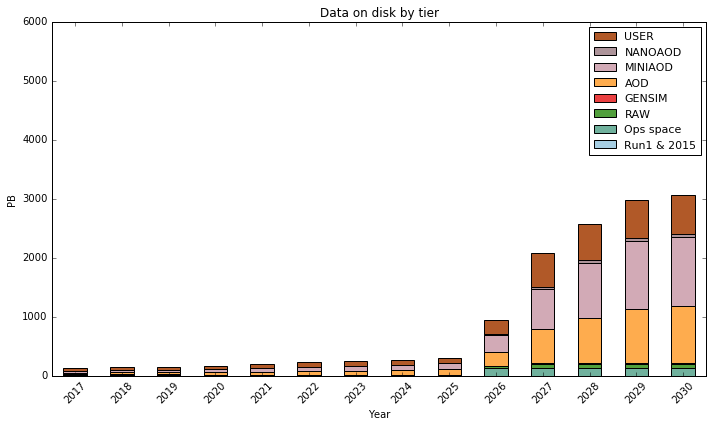

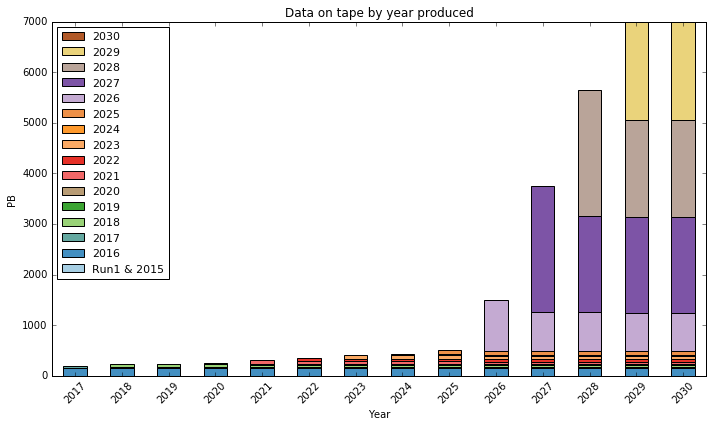

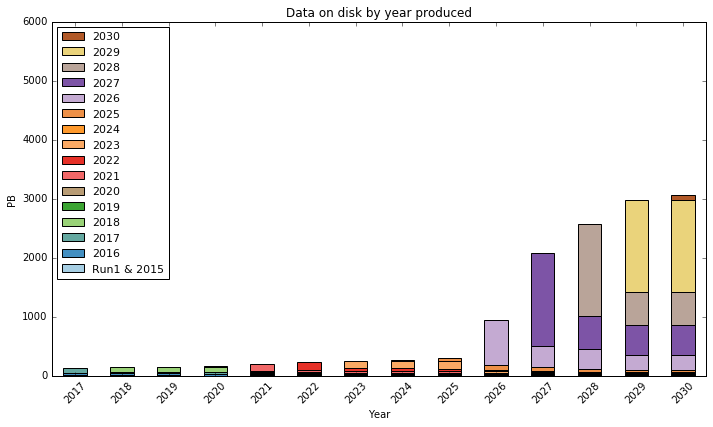

In [12]:
diskAdded,tapeAdded,diskCapacity,tapeCapacity = build_storage_capacity_model(model)
dataProduced,producedByTier = compute_storage_needs(model)
diskByYear,tapeByYear,dataOnDisk,dataOnTape,diskSamples,tapeSamples,copies_on_disk,tiers_on_disk = compute_annual_storage(model,dataProduced, producedByTier)
diskByTier,tapeByTier = create_storage_dataframes(dataOnDisk,dataOnTape,diskByYear,tapeByYear)
add_legacy_disk(model,diskByTier,diskByYear)
storage_plots(model,producedByTier,diskByTier,tapeByTier,diskByYear,tapeByYear)


In [13]:
storage_totals=storage_table(model,producedByTier,diskByTier,tapeByTier,diskByYear,tapeByYear,diskSamples,tapeSamples,copies_on_disk,tiers_on_disk)


Disk by tier printout in PB

year;AOD;MINIAOD;NANOAOD;RAW;USER;GENSIM;Ops space;Run1 & 2015;total;40%
2016    18.47    20.78     0.00     0.93    40.10     1.80    13.00    10.00  105.07   42.03
2017    26.84    32.64     0.00     0.93    47.10     1.81    13.00     5.00  127.32   50.93
2018    35.33    44.69     0.00     0.93    49.71     1.82    13.00     5.00  150.47   60.19
2019    37.01    46.37     0.00     0.93    51.25     1.82    13.00     5.00  155.37   62.15
2020    41.29    50.65     0.00     0.93    51.44     1.82    13.00     0.00  159.11   63.65
2021    52.68    59.60     0.00     1.85    73.99     1.84    13.00     0.00  202.97   81.19
2022    60.93    69.97     0.00     1.85    81.37     1.85    13.00     0.00  228.98   91.59
2023    70.34    81.49     0.00     1.85    85.14     1.86    13.00     0.00  253.68  101.47
2024    73.04    84.05     0.00     1.85    87.47     1.86    13.00     0.00  261.28  104.51
2025    89.94   100.91     0.48     1.85    92.73     1.86  

Year    kHS06  PBDisk  PBTape   Cost   Cost   Cost
2016    826.7   105.1   159.0   11.6   10.7    2.0
2017    991.7   127.3   186.6    2.8    2.7    0.5
2018   1156.8   150.5   214.3    2.5    2.4    0.4
2019   2041.1   155.4   222.1    8.1    1.0    0.2
2020    998.9   159.1   230.0    0.0    0.8    0.2
2021   1368.6   203.0   285.0    2.9    2.5    0.4
2022    998.4   229.0   334.7    3.0    5.7    1.1
2023   1080.4   253.7   384.6    1.6    2.0    0.4
2024   1247.4   261.3   397.0    1.8    1.3    0.2
2025   4311.6   300.8   469.3   14.5    1.5    0.3
2026  11684.1   943.8  1362.5   23.1   15.0    2.6
2027  26200.8  2071.8  3388.1   40.7   23.4    5.2
2028  24623.6  2575.4  5098.2    0.0   11.1    4.2
2029  23258.4  2978.0  6795.5    0.0    6.9    3.4
2030  21917.0  3072.0  7139.1    0.0    1.8    0.7


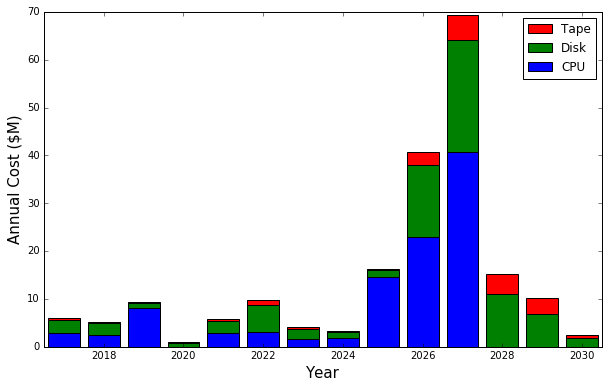

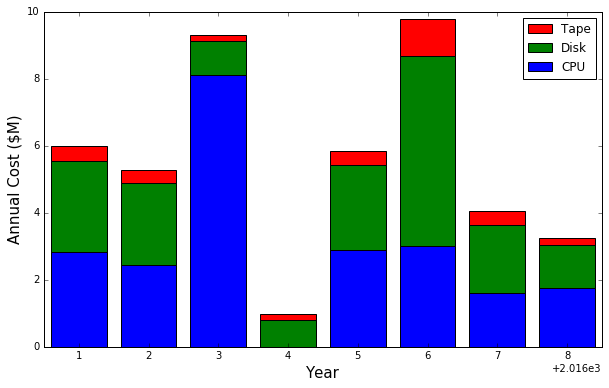

In [14]:
#example, these are TH06*seconds - roughtly taken from May exercise
import numpy
needed_resources={}

YEARS = numpy.arange(model['start_year'], model['end_year']+1)
needed_resources['cpu'] = numpy.array( [cpu_time['total'][y]  for y in YEARS] ) / ( 365.*24.*3600)
#numpy.array( [30,30,35,65,30,42,30,35,39,150,350,850,800,750,700])
#convert this to HS06 needed during the year assuming that its flat needes over the year.
#get to HS06
#needed_resources['cpu'] = 1.e12*needed_resources['cpu'] / ( 365.*24.*3600)
needed_resources['disk'] = storage_totals['disk']#numpy.array( [130,130,130,150,160,210,230,250,275,300,1000,2200,2600,2900,3100])
needed_resources['tape'] = storage_totals['tape']#numpy.array( [190,190,210,230,240,300,350,400,450,500,1200,3500,5500,7000,8000])

%run CostEvolution.ipynb
cost_models=define_cost_model()
#years=numpy.arange(2016,2031)

costPerYear=computeCosts(YEARS,cost_models, needed_resources)


plotCosts(1,YEARS,[costPerYear['cpu'],costPerYear['disk'],costPerYear['tape']],
         ['CPU','Disk','Tape'])

plotCosts(2,YEARS[:9],[costPerYear['cpu'][:9],costPerYear['disk'][:9],costPerYear['tape'][:9]],
         ['CPU','Disk','Tape'])
